# 💿 Подключение к Google Drive

Перед началом работы необходимо подключить Google Drive. Установите значение переменной PROJECT:

## Метод 1, через Secret:

1. В левой панели перейдите на вкладку "Ключ" (🔑)
2. Добавьте следующие секрет:
    - `PROJECT`: `/content/drive/<путь к папке на Google Drive>`

## Метод 2, напрямую в ячейке с кодом:

`PROJECT = '/content/drive/<путь к папке на Google Drive>'`

После этого запустите ячейку с кодом.

In [1]:
# Mount Google Drive and setup paths
PROJECT = ''

if PROJECT == '':
    try:
      from google.colab import userdata
      PROJECT = userdata.get('PROJECT')
    except:
      print('Секрет PROJECT не установлен')
      raise

if str.isspace(PROJECT) or PROJECT == '':
  raise Exception("Не удалось установить значение переменной PROJECT")

from google.colab import drive
drive.mount('/content/drive')

# Add src directory to Python path
import sys
if f'{PROJECT}/src' not in sys.path:
    sys.path.insert(0, f'{PROJECT}/src')

# Change to project directory
%cd {PROJECT}

# Verify path is added
import os
print(f"✅ Added to sys.path: {PROJECT}/src")
print(f"📁 Current directory: {os.getcwd()}")
print(f"🔍 Available modules in src: {os.listdir('src') if os.path.exists('src') else 'src not found'}")

!pip -q install -U pip
!pip -q install -r requirements.txt

Mounted at /content/drive
/content/drive/Othercomputers/Ноутбук/colab-training
✅ Added to sys.path: /content/drive/Othercomputers/Ноутбук/colab-training/src
📁 Current directory: /content/drive/Othercomputers/Ноутбук/colab-training
🔍 Available modules in src: ['data', 'models', 'training', 'utils', 'analysis', '__pycache__', '__init__.py', 'test.py', 'config.py']
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.2 MB/s eta 0:00:00


# 🔑 Настройка переменных окружения

Перед запуском блокнота необходимо настроить переменные окружения:

1. Перейдите к иконке ключа (🔑) в левой боковой панели
2. Добавьте следующие секреты:
   - `SUPABASE_URL`: URL вашего проекта Supabase
   - `SUPABASE_PUBLISHABLE_KEY`: Ваш анонимный ключ Supabase
   - `EMAIL`: Ваш email для входа
   - `PASSWORD`: Ваш пароль для входа

# ⚙️ Конфигурация

## Установка путей

- LMDB_PATH: путь к файлу .lmdb - итоговый датасет
- MAP_PATH: путь к файлу .json - словарь для соответствия подписи в lmdb и её записи в базе данных

In [2]:
# Установка путей
LMDB_PATH = '/content/drive/MyDrive/datasets/v1.lmdb'
MAP_PATH = '/content/drive/MyDrive/datasets/v1.json'

# Фильтрация подписей при создании датасета
INPUT_TYPE = 'any'  # Фильтр по типу ввода: 'any', 'mouse', 'touch', или 'pen'

In [3]:
# 🚀 Обучение
OUTPUT_DIR = "/content/drive/MyDrive/runs"

FEATURE_PIPELINE = [
    "x", "y", "p", "t",
    "vx", "vy", "ax", "ay", "prate", "path_tangent_angle", "abs_delta_pressure"
]

from config import DatasetConfig, ModelConfig, TrainingConfig
from training import TrainingRunner

# Dataset configuration
ds_cfg = DatasetConfig(
    lmdb_path = LMDB_PATH,
    feature_pipeline = FEATURE_PIPELINE,
    dataset_sample_ratio = None
)

# Model configuration
model_cfg = ModelConfig(

)

# Training configuration
train_cfg = TrainingConfig(
  output_dir = OUTPUT_DIR,
)

print("🚀 Starting Hybrid Model Training\n")

try:
    runner = TrainingRunner(
        dataset_cfg=ds_cfg, model_cfg=model_cfg, train_cfg=train_cfg
    )
    runner.run()

    print("\n" + "=" * 80)
    print("✅ Training completed successfully!")
    print("=" * 80)

except KeyboardInterrupt:
    print("\n⚠️ Training interrupted by user")

except Exception as e:
    print("\n" + "=" * 80)
    print("❌ Training failed with error:")
    print("=" * 80)
    print(f"\n{type(e).__name__}: {e}\n")
    import traceback

    traceback.print_exc()
    exit(1)

🚀 Starting Hybrid Model Training

Starting training run...
[23:08:46] Metrics will be logged to: /content/drive/MyDrive/runs/20251020_230845/logs/epoch_metrics.csv
[23:08:46] Starting training run: 20251020_230845
[23:08:46] Device: cuda
[23:08:46] Checkpoint dir: /content/drive/MyDrive/runs/20251020_230845/checkpoints
[23:08:46] Log dir: /content/drive/MyDrive/runs/20251020_230845/logs
[23:08:46] Export dir: /content/drive/MyDrive/runs/20251020_230845/exports
[23:08:46] ================================================================================
[23:08:46] FULL CONFIGURATION DUMP
[23:08:46] ================================================================================
[23:08:46] DatasetConfig:
[23:08:46]   lmdb_path: /content/drive/MyDrive/datasets/v1.lmdb
[23:08:46]   num_workers: 0
[23:08:46]   batch_size: 64
[23:08:46]   augment: True
[23:08:46]   max_sequence_length: 1024
[23:08:46]   feature_pipeline: ['x', 'y', 'p', 't', 'vx', 'vy', 'ax', 'ay', 'prate', 'path_tangent_angle

train: 100%|██████████| 29/29 [00:11<00:00,  2.55it/s]

[23:12:45] Starting validation...



eval: 100%|██████████| 39/39 [00:09<00:00,  4.05it/s]


[23:12:56] Validation - EER: 0.2949, AUC: 0.7853
[23:12:56] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:12:56] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:12:56] New best EER: 0.2949
[23:12:56] Epoch 1 Summary:
[23:12:56]   Train Loss: 0.1612
[23:12:56]   Val EER: 0.2949, Val AUC: 0.7853
[23:12:56]   Best EER: 0.2949
[23:12:56]   LR: 0.000053, Miner: semi-hard
[23:12:56]   Epoch Time: 22.85s
[23:12:56] 
=== Epoch 2/20 ===


train: 100%|██████████| 29/29 [00:07<00:00,  3.64it/s]

[23:13:04] Starting validation...



eval: 100%|██████████| 39/39 [00:09<00:00,  4.05it/s]


[23:13:15] Validation - EER: 0.2918, AUC: 0.7925
[23:13:16] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:13:16] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:13:16] New best EER: 0.2918
[23:13:16] Epoch 2 Summary:
[23:13:16]   Train Loss: 0.1437
[23:13:16]   Val EER: 0.2918, Val AUC: 0.7925
[23:13:16]   Best EER: 0.2918
[23:13:16]   LR: 0.000141, Miner: semi-hard
[23:13:16]   Epoch Time: 19.47s
[23:13:16] 
=== Epoch 3/20 ===


train: 100%|██████████| 29/29 [00:09<00:00,  2.96it/s]

[23:13:26] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.84it/s]


[23:13:37] Validation - EER: 0.2789, AUC: 0.7957
[23:13:37] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:13:38] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:13:38] New best EER: 0.2789
[23:13:38] Epoch 3 Summary:
[23:13:38]   Train Loss: 0.1346
[23:13:38]   Val EER: 0.2789, Val AUC: 0.7957
[23:13:38]   Best EER: 0.2789
[23:13:38]   LR: 0.000262, Miner: semi-hard
[23:13:38]   Epoch Time: 21.82s
[23:13:38] 
=== Epoch 4/20 ===


train: 100%|██████████| 29/29 [00:09<00:00,  3.19it/s]

[23:13:47] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.86it/s]


[23:13:59] Validation - EER: 0.2702, AUC: 0.7980
[23:13:59] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:13:59] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:13:59] New best EER: 0.2702
[23:13:59] Epoch 4 Summary:
[23:13:59]   Train Loss: 0.1255
[23:13:59]   Val EER: 0.2702, Val AUC: 0.7980
[23:13:59]   Best EER: 0.2702
[23:13:59]   LR: 0.000383, Miner: semi-hard
[23:13:59]   Epoch Time: 21.53s
[23:13:59] 
=== Epoch 5/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.51it/s]

[23:14:08] Starting validation...



eval: 100%|██████████| 39/39 [00:11<00:00,  3.54it/s]


[23:14:20] Validation - EER: 0.2628, AUC: 0.7930
[23:14:20] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:14:21] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:14:21] New best EER: 0.2628
[23:14:21] Epoch 5 Summary:
[23:14:21]   Train Loss: 0.1062
[23:14:21]   Val EER: 0.2628, Val AUC: 0.7930
[23:14:21]   Best EER: 0.2628
[23:14:21]   LR: 0.000470, Miner: semi-hard
[23:14:21]   Epoch Time: 21.15s
[23:14:21] 
=== Epoch 6/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]

[23:14:29] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.63it/s]


[23:14:42] Validation - EER: 0.2582, AUC: 0.8206
[23:14:42] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:14:42] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:14:42] New best EER: 0.2582
[23:14:42] Epoch 6 Summary:
[23:14:42]   Train Loss: 0.1124
[23:14:42]   Val EER: 0.2582, Val AUC: 0.8206
[23:14:42]   Best EER: 0.2582
[23:14:42]   LR: 0.000500, Miner: semi-hard
[23:14:42]   Epoch Time: 21.41s
[23:14:42] 
=== Epoch 7/20 ===


train: 100%|██████████| 29/29 [00:09<00:00,  3.19it/s]

[23:14:51] Starting validation...



eval: 100%|██████████| 39/39 [00:09<00:00,  3.95it/s]


[23:15:03] Validation - EER: 0.2524, AUC: 0.8113
[23:15:03] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:15:04] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:15:04] New best EER: 0.2524
[23:15:04] Epoch 7 Summary:
[23:15:04]   Train Loss: 0.1063
[23:15:04]   Val EER: 0.2524, Val AUC: 0.8113
[23:15:04]   Best EER: 0.2524
[23:15:04]   LR: 0.000493, Miner: semi-hard
[23:15:04]   Epoch Time: 21.48s
[23:15:04] 
=== Epoch 8/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.62it/s]

[23:15:12] Starting validation...



eval: 100%|██████████| 39/39 [00:11<00:00,  3.45it/s]


[23:15:25] Validation - EER: 0.2408, AUC: 0.8379
[23:15:25] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:15:25] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:15:25] New best EER: 0.2408
[23:15:25] Epoch 8 Summary:
[23:15:25]   Train Loss: 0.1032
[23:15:25]   Val EER: 0.2408, Val AUC: 0.8379
[23:15:25]   Best EER: 0.2408
[23:15:25]   LR: 0.000474, Miner: semi-hard
[23:15:25]   Epoch Time: 21.26s
[23:15:25] 
=== Epoch 9/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.29it/s]

[23:15:34] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.61it/s]


[23:15:46] Validation - EER: 0.2561, AUC: 0.8136
[23:15:46] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:15:46] Switched to hard mining and reduced LR by 0.5x
[23:15:46] Epoch 9 Summary:
[23:15:46]   Train Loss: 0.0972
[23:15:46]   Val EER: 0.2561, Val AUC: 0.8136
[23:15:46]   Best EER: 0.2408
[23:15:46]   LR: 0.000311, Miner: hard
[23:15:46]   Epoch Time: 21.39s
[23:15:46] 
=== Epoch 10/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.61it/s]

[23:15:54] Starting validation...



eval: 100%|██████████| 39/39 [00:09<00:00,  3.92it/s]


[23:16:06] Validation - EER: 0.2488, AUC: 0.8276
[23:16:06] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:16:06] Epoch 10 Summary:
[23:16:06]   Train Loss: 0.2531
[23:16:06]   Val EER: 0.2488, Val AUC: 0.8276
[23:16:06]   Best EER: 0.2408
[23:16:06]   LR: 0.000404, Miner: hard
[23:16:06]   Epoch Time: 19.73s
[23:16:06] 
=== Epoch 11/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]

[23:16:15] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.80it/s]


[23:16:27] Validation - EER: 0.2496, AUC: 0.8331
[23:16:27] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:16:27] Epoch 11 Summary:
[23:16:27]   Train Loss: 0.2335
[23:16:27]   Val EER: 0.2496, Val AUC: 0.8331
[23:16:27]   Best EER: 0.2408
[23:16:27]   LR: 0.000357, Miner: hard
[23:16:27]   Epoch Time: 20.76s
[23:16:27] 
=== Epoch 12/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.34it/s]

[23:16:36] Starting validation...



eval: 100%|██████████| 39/39 [00:09<00:00,  4.18it/s]


[23:16:47] Validation - EER: 0.2404, AUC: 0.8373
[23:16:47] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:16:47] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:16:47] New best EER: 0.2404
[23:16:47] Epoch 12 Summary:
[23:16:47]   Train Loss: 0.2220
[23:16:47]   Val EER: 0.2404, Val AUC: 0.8373
[23:16:47]   Best EER: 0.2404
[23:16:47]   LR: 0.000304, Miner: hard
[23:16:47]   Epoch Time: 20.42s
[23:16:47] 
=== Epoch 13/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.60it/s]

[23:16:55] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.57it/s]


[23:17:08] Validation - EER: 0.2365, AUC: 0.8435
[23:17:08] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:17:08] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:17:08] New best EER: 0.2365
[23:17:09] Epoch 13 Summary:
[23:17:09]   Train Loss: 0.2199
[23:17:09]   Val EER: 0.2365, Val AUC: 0.8435
[23:17:09]   Best EER: 0.2365
[23:17:09]   LR: 0.000248, Miner: hard
[23:17:09]   Epoch Time: 20.94s
[23:17:09] 
=== Epoch 14/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.34it/s]

[23:17:17] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.58it/s]


[23:17:30] Validation - EER: 0.2279, AUC: 0.8630
[23:17:30] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:17:30] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:17:30] New best EER: 0.2279
[23:17:30] Epoch 14 Summary:
[23:17:30]   Train Loss: 0.2061
[23:17:30]   Val EER: 0.2279, Val AUC: 0.8630
[23:17:30]   Best EER: 0.2279
[23:17:30]   LR: 0.000192, Miner: hard
[23:17:30]   Epoch Time: 21.47s
[23:17:30] 
=== Epoch 15/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.62it/s]

[23:17:38] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.62it/s]


[23:17:51] Validation - EER: 0.2209, AUC: 0.8634
[23:17:51] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:17:51] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:17:51] New best EER: 0.2209
[23:17:51] Epoch 15 Summary:
[23:17:51]   Train Loss: 0.1818
[23:17:51]   Val EER: 0.2209, Val AUC: 0.8634
[23:17:51]   Best EER: 0.2209
[23:17:51]   LR: 0.000140, Miner: hard
[23:17:51]   Epoch Time: 20.88s
[23:17:51] 
=== Epoch 16/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.34it/s]

[23:18:00] Starting validation...



eval: 100%|██████████| 39/39 [00:11<00:00,  3.48it/s]


[23:18:12] Validation - EER: 0.2162, AUC: 0.8694
[23:18:13] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:18:13] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:18:13] New best EER: 0.2162
[23:18:13] Epoch 16 Summary:
[23:18:13]   Train Loss: 0.1689
[23:18:13]   Val EER: 0.2162, Val AUC: 0.8694
[23:18:13]   Best EER: 0.2162
[23:18:13]   LR: 0.000093, Miner: hard
[23:18:13]   Epoch Time: 21.81s
[23:18:13] 
=== Epoch 17/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.34it/s]

[23:18:21] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.58it/s]


[23:18:34] Validation - EER: 0.2117, AUC: 0.8730
[23:18:34] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:18:34] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:18:34] New best EER: 0.2117
[23:18:34] Epoch 17 Summary:
[23:18:34]   Train Loss: 0.1563
[23:18:34]   Val EER: 0.2117, Val AUC: 0.8730
[23:18:34]   Best EER: 0.2117
[23:18:34]   LR: 0.000053, Miner: hard
[23:18:34]   Epoch Time: 21.57s
[23:18:34] 
=== Epoch 18/20 ===


train: 100%|██████████| 29/29 [00:07<00:00,  3.67it/s]

[23:18:42] Starting validation...



eval: 100%|██████████| 39/39 [00:11<00:00,  3.53it/s]


[23:18:55] Validation - EER: 0.2097, AUC: 0.8748
[23:18:55] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:18:55] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:18:55] New best EER: 0.2097
[23:18:55] Epoch 18 Summary:
[23:18:55]   Train Loss: 0.1673
[23:18:55]   Val EER: 0.2097, Val AUC: 0.8748
[23:18:55]   Best EER: 0.2097
[23:18:55]   LR: 0.000024, Miner: hard
[23:18:55]   Epoch Time: 20.86s
[23:18:55] 
=== Epoch 19/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]

[23:19:04] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.57it/s]


[23:19:17] Validation - EER: 0.2093, AUC: 0.8755
[23:19:17] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:19:17] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:19:17] New best EER: 0.2093
[23:19:17] Epoch 19 Summary:
[23:19:17]   Train Loss: 0.1690
[23:19:17]   Val EER: 0.2093, Val AUC: 0.8755
[23:19:17]   Best EER: 0.2093
[23:19:17]   LR: 0.000006, Miner: hard
[23:19:17]   Epoch Time: 21.58s
[23:19:17] 
=== Epoch 20/20 ===


train: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]

[23:19:26] Starting validation...



eval: 100%|██████████| 39/39 [00:10<00:00,  3.66it/s]


[23:19:38] Validation - EER: 0.2079, AUC: 0.8775
[23:19:38] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/last.pt
[23:19:39] Checkpoint saved: /content/drive/MyDrive/runs/20251020_230845/checkpoints/best_by_eer.pt
[23:19:39] New best EER: 0.2079
[23:19:39] Epoch 20 Summary:
[23:19:39]   Train Loss: 0.1525
[23:19:39]   Val EER: 0.2079, Val AUC: 0.8775
[23:19:39]   Best EER: 0.2079
[23:19:39]   LR: 0.000000, Miner: hard
[23:19:39]   Epoch Time: 21.75s
[23:19:39] 
[23:19:39] FINAL TEST EVALUATION
[23:19:39] ================================================================================


eval: 100%|██████████| 40/40 [00:09<00:00,  4.19it/s]


[23:19:52] FINAL TEST RESULTS:
[23:19:52]   Test EER: 0.2206
[23:19:52]   Test AUC: 0.8633
[23:19:52]   Evaluation Time: 13.12s
[23:19:53] ================================================================================
[23:19:53] Training completed successfully!
[23:19:53] ================================================================================

✅ Training completed successfully!


In [ ]:

# Проверка готовности

# Проверка работы импортов
try:
    import analysis
    import data
    import models
    import training
    import utils
    import config
    print("✅ Все модули успешно импортированы!")
except ImportError as e:
    print(f"❌ Ошибка импорта: {e}")
    print("Доступные пути:", sys.path)

# Проверка переменных окружения
from google.colab import userdata
print(f"\n🔑 SUPABASE_URL: {'✅ Установлена' if userdata.get('SUPABASE_URL') else '❌ Отсутствует'}")
print(f"🔑 SUPABASE_PUBLISHABLE_KEY: {'✅ Установлена' if userdata.get('SUPABASE_PUBLISHABLE_KEY') else '❌ Отсутствует'}")
print(f"🔑 EMAIL: {'✅ Установлена' if userdata.get('EMAIL') else '❌ Отсутствует'}")
print(f"🔑 PASSWORD: {'✅ Установлена' if userdata.get('PASSWORD') else '❌ Отсутствует'}")


# Вывод конифигураций
from os import path
print(f"\nLMDB_PATH: {LMDB_PATH} ({"существует" if path.exists(LMDB_PATH) else "не существует"})")
print(f"MAP_PATH: {MAP_PATH} ({"существует" if path.exists(MAP_PATH) else "не существует"})")
print(f"INPUT_TYPE: {INPUT_TYPE}")


✅ Все модули успешно импортированы!

🔑 SUPABASE_URL: ✅ Установлена
🔑 SUPABASE_PUBLISHABLE_KEY: ✅ Установлена


In [ ]:
# Создание датасета

from data import build_lmdb_from_supabase
from google.colab import userdata
build_lmdb_from_supabase(
    supabase_url=userdata.get('SUPABASE_URL'),
    anon_key=userdata.get('SUPABASE_PUBLISHABLE_KEY'),
    email=userdata.get('EMAIL'),
    password=userdata.get('PASSWORD'),
    output_lmdb_path=LMDB_PATH,
    output_map_json_path=MAP_PATH,
    input_type=INPUT_TYPE,
)
print('LMDB записан в', LMDB_PATH)
print('MAP записан в', MAP_PATH)


In [ ]:
# Отчет по Supabase
from analysis import analyze_data, DataSource, print_supabase_report
print("Анализ...")
supabase_results = analyze_data(DataSource.SUPABASE,
    supabase_url=userdata.get('SUPABASE_URL'),
    anon_key=userdata.get('SUPABASE_PUBLISHABLE_KEY'),
    email=userdata.get('EMAIL'),
    password=userdata.get('PASSWORD')
)
print("=== ОТЧЕТ ПО SUPABASE ===")
print_supabase_report(supabase_results)


In [ ]:
# Отчет по LMDB
from analysis import analyze_data, DataSource, print_lmdb_report
print("Анализ LMDB...")
lmdb_results = analyze_data(DataSource.LMDB, lmdb_path=LMDB_PATH)
print("=== ОТЧЕТ ПО LMDB ===")
print_lmdb_report(lmdb_results)

duration_ms,genuine_count,forged_count
300,1,0
400,24,2
500,65,15
600,57,29
700,48,32
800,35,34
900,68,34
1000,65,43
1100,48,29
1200,72,38
1300,104,35
1400,121,58
1500,122,51
1600,117,49
1700,101,61
1800,130,67
1900,119,67
2000,148,81
2100,131,70
2200,156,75
2300,173,67
2400,187,89
2500,172,90
2600,158,79
2700,170,87
2800,173,90
2900,137,80
3000,174,78
3100,183,78
3200,156,92
3300,155,77
3400,133,75
3500,150,101
3600,165,93
3700,153,101
3800,152,111
3900,145,106
4000,144,87
4100,133,81
4200,128,86
4300,113,92
4400,122,111
4500,110,101
4600,96,95
4700,113,101
4800,114,108
4900,118,112
5000,106,101
5100,85,103
5200,98,87
5300,86,97
5400,75,100
5500,98,100
5600,72,77
5700,63,77
5800,64,73
5900,69,92
6000,66,110
6100,71,81
6200,66,76
6300,60,82
6400,46,75
6500,49,85
6600,59,80
6700,50,73
6800,56,69
6900,49,83
7000,47,62
7100,48,63
7200,56,53
7300,44,53
7400,48,62
7500,33,56
7600,46,51
7700,30,72
7800,33,62
7900,31,56
8000,30,62
8100,23,49
8200,28,48
8300,16,44
8400,29,47
8500,21,53
8600,20

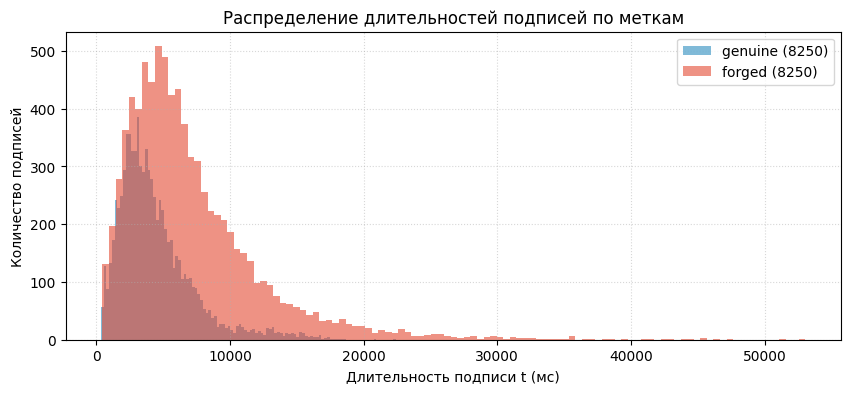

In [ ]:
# 📊 Визуализация распределения t для LMDB
from analysis import plot_t_distribution_by_label

fig, text = plot_t_distribution_by_label(LMDB_PATH, bin_width=500, text_step=100, overlay=True)
fig.show()
print(text)

In [ ]:
# 🔍 Поиск неподрезанных подписей с мусорными точками
from analysis import find_untrimmed_signatures

problematic = find_untrimmed_signatures(LMDB_PATH, max_skip_check=10)
print(f"Найдено {len(problematic)} подозрительных подписей")
# Выведем первые 10 результатов
for rec in problematic[:10]:
    print(rec)
